## Game Information
In order to understand all the steps done during the prediction model development, we are going to learn the most important objectives of the game.

    - The Nexus is the most important structure of the team and also, the main objective of enemies. The importance of this structure resides in the fact that the team that destroys it, wins. Allies will have to do some team-work in order to protect it from strong enemies that will try to destroy it at any price.

    - Inhibitors are one important structure that once destroyed, the enemy minions become very stronger. There is one Inhibitor in each lane and at least one has to be destroyed to win, otherwise, the Nexus is indestructible.

    - Towers are important defensive structures that protect the base and lanes of teams. Each team has 3 in each lane and 2 in front of the Nexus that always prioritizes champions over other targets. They have huge damage, so destroying them provides a big advantage to the enemy team.

    - Rift Herald is one of the epic monsters that appear during the game. The team who kills it gets an object that once thrown, a Rift Herald spawns and helps them destroying enemy towers.

    - Dragon is another epic monster that keeps appearing in the game every certain time. The team who kills it, gets his stats improved.

    - Baron is probably the most important epic monster. Like the dragon, the team who kills it has a huge improvement in his stats and also makes their minions stronger so pushing lanes and taking objectives becomes easier.


# Data Exploration
In this section we are going to understand the database and see each of the attributes, we will determine which is our target attribute


First of all we will import all the libraries here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/home/david/Escritorio/3r-Compu/ApC/LOL-SOLO-Q-Ranked-Games-Predictor/data/archive/lol_ranked_games.csv')

In [3]:
pd.set_option('display.max_columns', None)
dataset.head()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,destroyedTopInhibitor,destroyedMidInhibitor,destroyedBotInhibitor,lostTopInhibitor,lostMidInhibitor,lostBotInhibitor,destroyedTopNexusTurret,destroyedMidNexusTurret,destroyedBotNexusTurret,lostTopNexusTurret,lostMidNexusTurret,lostBotNexusTurret,destroyedTopBaseTurret,destroyedMidBaseTurret,destroyedBotBaseTurret,lostTopBaseTurret,lostMidBaseTurret,lostBotBaseTurret,destroyedTopInnerTurret,destroyedMidInnerTurret,destroyedBotInnerTurret,lostTopInnerTurret,lostMidInnerTurret,lostBotInnerTurret,destroyedTopOuterTurret,destroyedMidOuterTurret,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
0,4546233126,1443000,1,10,-448,-147,-0.2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,5,21,3,5
1,4546233126,1443000,1,12,-1306,-925,-0.6,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,11,6,28,4,6
2,4546233126,1443000,1,14,2115,2578,0.4,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10,11,12,35,4,6
3,4546233126,1443000,1,16,1195,2134,0.4,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,10,12,12,45,6,10
4,4546233126,1443000,1,18,2931,4382,0.6,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,13,13,16,49,7,12


As we can see the our target its going to be hasWon, we will try to make a Model to predict if the blue team won the game or not, but before start making the model we have to explore our data.

In [4]:
dataset.describe()

,gameId,gameDuration,hasWon,frame,goldDiff,expDiff,champLevelDiff,isFirstTower,isFirstBlood,killedFireDrake,killedWaterDrake,killedAirDrake,killedEarthDrake,killedElderDrake,lostFireDrake,lostWaterDrake,lostAirDrake,lostEarthDrake,lostElderDrake,killedBaronNashor,lostBaronNashor,killedRiftHerald,lostRiftHerald,destroyedTopInhibitor,destroyedMidInhibitor,destroyedBotInhibitor,lostTopInhibitor,lostMidInhibitor,lostBotInhibitor,destroyedTopNexusTurret,destroyedMidNexusTurret,destroyedBotNexusTurret,lostTopNexusTurret,lostMidNexusTurret,lostBotNexusTurret,destroyedTopBaseTurret,destroyedMidBaseTurret,destroyedBotBaseTurret,lostTopBaseTurret,lostMidBaseTurret,lostBotBaseTurret,destroyedTopInnerTurret,destroyedMidInnerTurret,destroyedBotInnerTurret,lostTopInnerTurret,lostMidInnerTurret,lostBotInnerTurret,destroyedTopOuterTurret,destroyedMidOuterTurret,destroyedBotOuterTurret,lostTopOuterTurret,lostMidOuterTurret,lostBotOuterTurret,kills,deaths,assists,wardsPlaced,wardsDestroyed,wardsLost
count,2.425720e+05,2.425720e+05,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.0,242572.0,242572.000000,242572.0,242572.0,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000,242572.000000
mean,4.501480e+09,1.785494e+06,0.498128,19.811264,-11.413811,-215.019351,-0.026517,0.617709,0.998627,0.295908,0.300241,0.301943,0.303609,0.005545,0.308539,0.313899,0.315135,0.319794,0.005714,0.141274,0.158316,0.564319,0.617380,0.021977,0.030045,0.087689,0.021960,0.030354,0.081419,0.032184,0.038747,0.101656,0.030424,0.037828,0.093185,0.0,0.0,0.052005,0.0,0.0,0.051003,0.120624,0.117305,0.193027,0.110998,0.117553,0.179229,0.379487,0.381870,0.369997,0.376795,0.368822,0.355243,16.391381,16.342220,21.166029,56.833530,10.487031,10.263077
std,5.331693e+07,3.761901e+05,0.499998,7.197339,5438.051920,5261.880802,0.772366,0.485948,0.037026,0.509759,0.515638,0.515935,0.519595,0.078099,0.518721,0.523259,0.524350,0.531450,0.079161,0.388436,0.412581,0.665504,0.693911,0.154788,0.179837,0.313325,0.154497,0.180825,0.298613,0.176490,0.192992,0.302197,0.171751,0.190780,0.290692,0.0,0.0,0.284509,0.0,0.0,0.283813,0.325690,0.321784,0.394675,0.314130,0.322078,0.383545,0.485260,0.485846,0.482805,0.484584,0.482487,0.478588,9.660237,9.697602,16.055645,58.734777,8.713549,8.736323
min,4.357970e+09,5.490000e+05,0.000000,10.000000,-21578.000000,-32484.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,4.463051e+09,1.532000e+06,0.000000,14.000000,-3420.250000,-3148.000000,-0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,9.000000,9.000000,25.000000,4.000000,4.000000
50%,4.529395e+09,1.774000e+06,0.000000,18.000000,24.0000

Now we are going to see if there some null values in the BD.

In [5]:
print('Total of missing values found:', dataset.isna().sum().sum(), '.')

Total of missing values found: 0 .


In [6]:
## Im going to reduce the dataset len bc it has a lot of samples
dataset= dataset[::5]

As we can se a lot of values are Binary values , we are going to make the histogram for all the values that are not binary. And we don't have missing values.

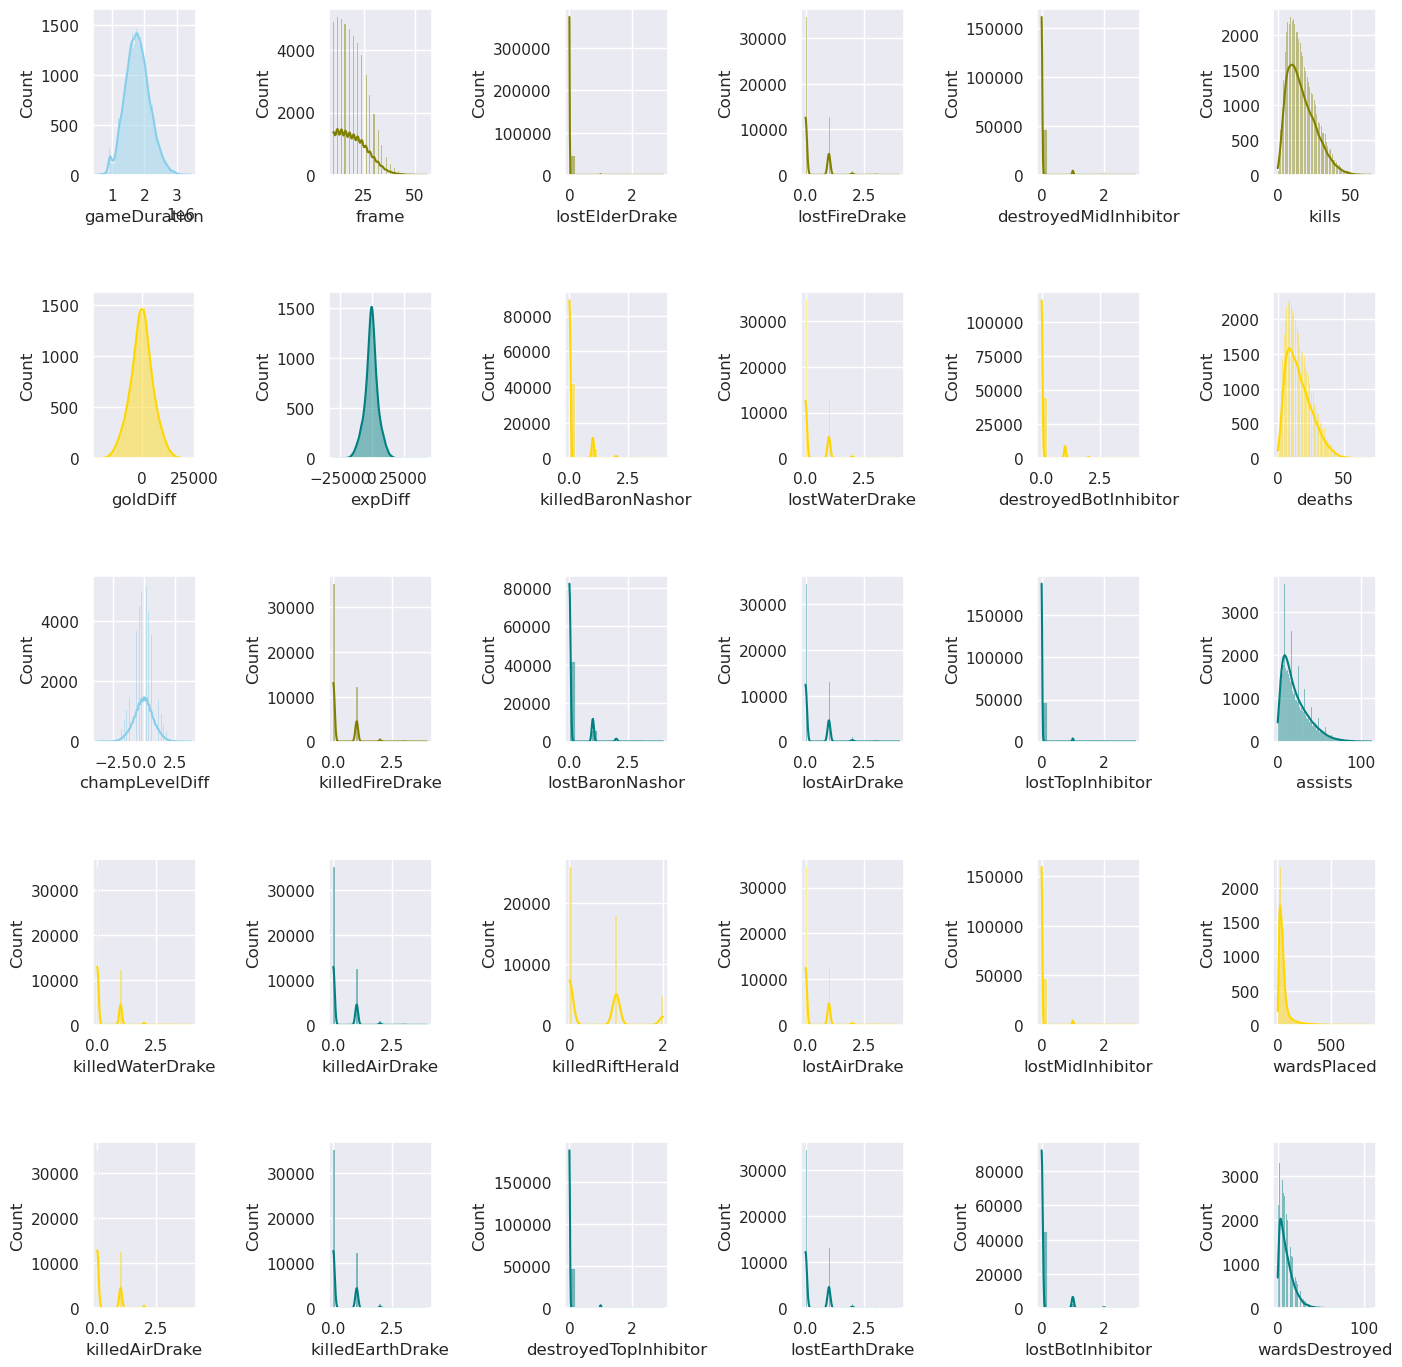

In [7]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(5, 6, figsize=(15, 15))
fig.tight_layout(pad=5.0)

sns.histplot(data=dataset, x="gameDuration", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dataset, x="frame", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dataset, x="goldDiff", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dataset, x="expDiff", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=dataset, x="champLevelDiff", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=dataset, x="killedFireDrake", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=dataset, x="killedWaterDrake", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=dataset, x="killedAirDrake", kde=True, color="teal", ax=axs[3, 1])
sns.histplot(data=dataset, x="killedAirDrake", kde=True, color="gold", ax=axs[4, 0])
sns.histplot(data=dataset, x="killedEarthDrake", kde=True, color="teal", ax=axs[4, 1])


sns.histplot(data=dataset, x="lostElderDrake", kde=True, color="olive", ax=axs[0, 2])
sns.histplot(data=dataset, x="killedBaronNashor", kde=True, color="gold", ax=axs[1, 2])
sns.histplot(data=dataset, x="lostBaronNashor", kde=True, color="teal", ax=axs[2, 2])
sns.histplot(data=dataset, x="killedRiftHerald", kde=True, color="gold", ax=axs[3, 2])
sns.histplot(data=dataset, x="destroyedTopInhibitor", kde=True, color="teal", ax=axs[4, 2])


sns.histplot(data=dataset, x="lostFireDrake", kde=True, color="olive", ax=axs[0, 3])
sns.histplot(data=dataset, x="lostWaterDrake", kde=True, color="gold", ax=axs[1, 3])
sns.histplot(data=dataset, x="lostAirDrake", kde=True, color="teal", ax=axs[2, 3])
sns.histplot(data=dataset, x="lostAirDrake", kde=True, color="gold", ax=axs[3, 3])
sns.histplot(data=dataset, x="lostEarthDrake", kde=True, color="teal", ax=axs[4, 3])

sns.histplot(data=dataset, x="destroyedMidInhibitor", kde=True, color="olive", ax=axs[0, 4])
sns.histplot(data=dataset, x="destroyedBotInhibitor", kde=True, color="gold", ax=axs[1, 4])
sns.histplot(data=dataset, x="lostTopInhibitor", kde=True, color="teal", ax=axs[2, 4])
sns.histplot(data=dataset, x="lostMidInhibitor", kde=True, color="gold", ax=axs[3, 4])
sns.histplot(data=dataset, x="lostBotInhibitor", kde=True, color="teal", ax=axs[4, 4])

sns.histplot(data=dataset, x="kills", kde=True, color="olive", ax=axs[0, 5])
sns.histplot(data=dataset, x="deaths", kde=True, color="gold", ax=axs[1, 5])
sns.histplot(data=dataset, x="assists", kde=True, color="teal", ax=axs[2, 5])
sns.histplot(data=dataset, x="wardsPlaced", kde=True, color="gold", ax=axs[3, 5])
sns.histplot(data=dataset, x="wardsDestroyed", kde=True, color="teal", ax=axs[4, 5])


plt.show()

Here we can see a little bit the diferents histgrams of the diferents attributes we will get more deeper in the ones that are interesting for us later.

<Figure size 5800x100 with 0 Axes>

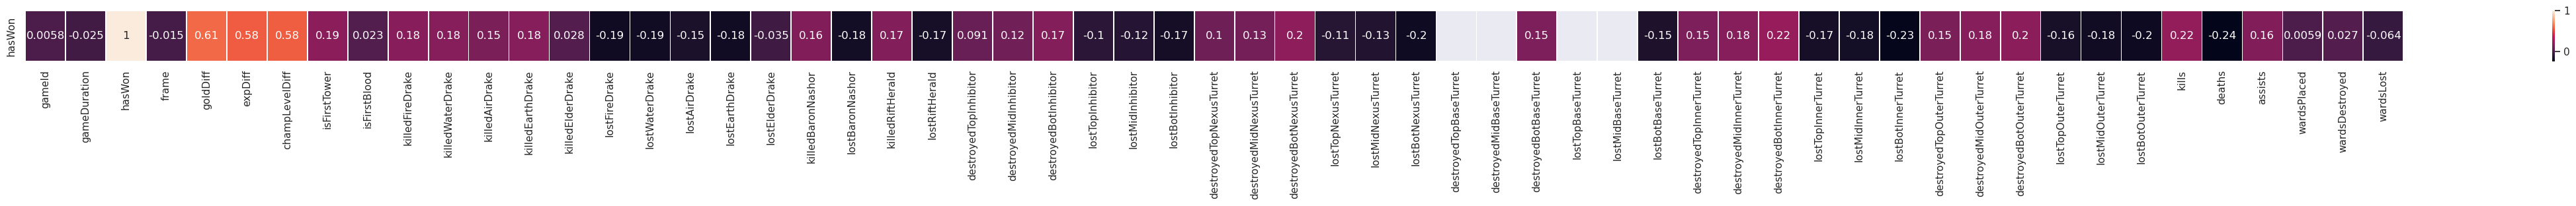

In [8]:
winner_correlation = dataset.corr()['hasWon'].to_frame().T 
plt.figure(figsize=(58,1))
plt.subplots(figsize=(58, 1))
sns.heatmap(winner_correlation, linewidths=0.5, annot=True)
plt.show()

As we can see there are some attr that have a strong correlation with the objective attr the ones that have more are gold Diff expDiff and ChampLevelDiff, there are a lot of attr that have less than 20 % of correlation we are going to focus on the ones that have more than 20 % of correlation but when later we will try with all or almost all the attr that we have to train our model.

We can see some negative correlation for example the deaths is a -0.24 this mean that if we have more deaths is more likeable to lose. 

In [9]:


correlation_threshold = 0.30

# According to the correlation values, we filter the useful attributes.
attributes = list(filter(lambda x: abs(float(winner_correlation[x])) > correlation_threshold, dataset.columns))

print('Total of useful attributes:', len(attributes), '.')

print(attributes)

correlation_threshold = 0.20

# According to the correlation values, we filter the useful attributes.
attributes = list(filter(lambda x: abs(float(winner_correlation[x])) > correlation_threshold, dataset.columns))

print('Total of useful attributes:', len(attributes), '.')
print(attributes)
print(len(attributes))


Total of useful attributes: 4 .
['hasWon', 'goldDiff', 'expDiff', 'champLevelDiff']
Total of useful attributes: 10 .
['hasWon', 'goldDiff', 'expDiff', 'champLevelDiff', 'destroyedBotNexusTurret', 'destroyedBotInnerTurret', 'lostBotInnerTurret', 'lostBotOuterTurret', 'kills', 'deaths']
10


Good attr (more than 30% of correlation):
 - goldDiff
 - expDiff 
 - champLevelDiff
Normal attr(more than 20% of correlation):
 - destroyedBotNexusTurret
 - destroyedBotInnerTurret
 - lostBotInnerTurret
 - lostBotOuterTurret
 - kills
 - deaths


Now we are going to drop all the non-usefull attr:

In [10]:
clean_dataset = dataset[attributes]
clean_dataset = clean_dataset.drop(['hasWon'], axis=1)
y = dataset['hasWon']
clean_dataset.head()

,goldDiff,expDiff,champLevelDiff,destroyedBotNexusTurret,destroyedBotInnerTurret,lostBotInnerTurret,lostBotOuterTurret,kills,deaths
0,-448,-147,-0.2,0,0,0,0,4,7
5,6127,7606,0.8,0,0,0,0,20,14
10,1949,3018,0.6,0,0,0,0,10,8
15,-1050,-544,-0.2,0,0,0,0,8,6
20,341,3707,0.6,0,0,0,0,23,14


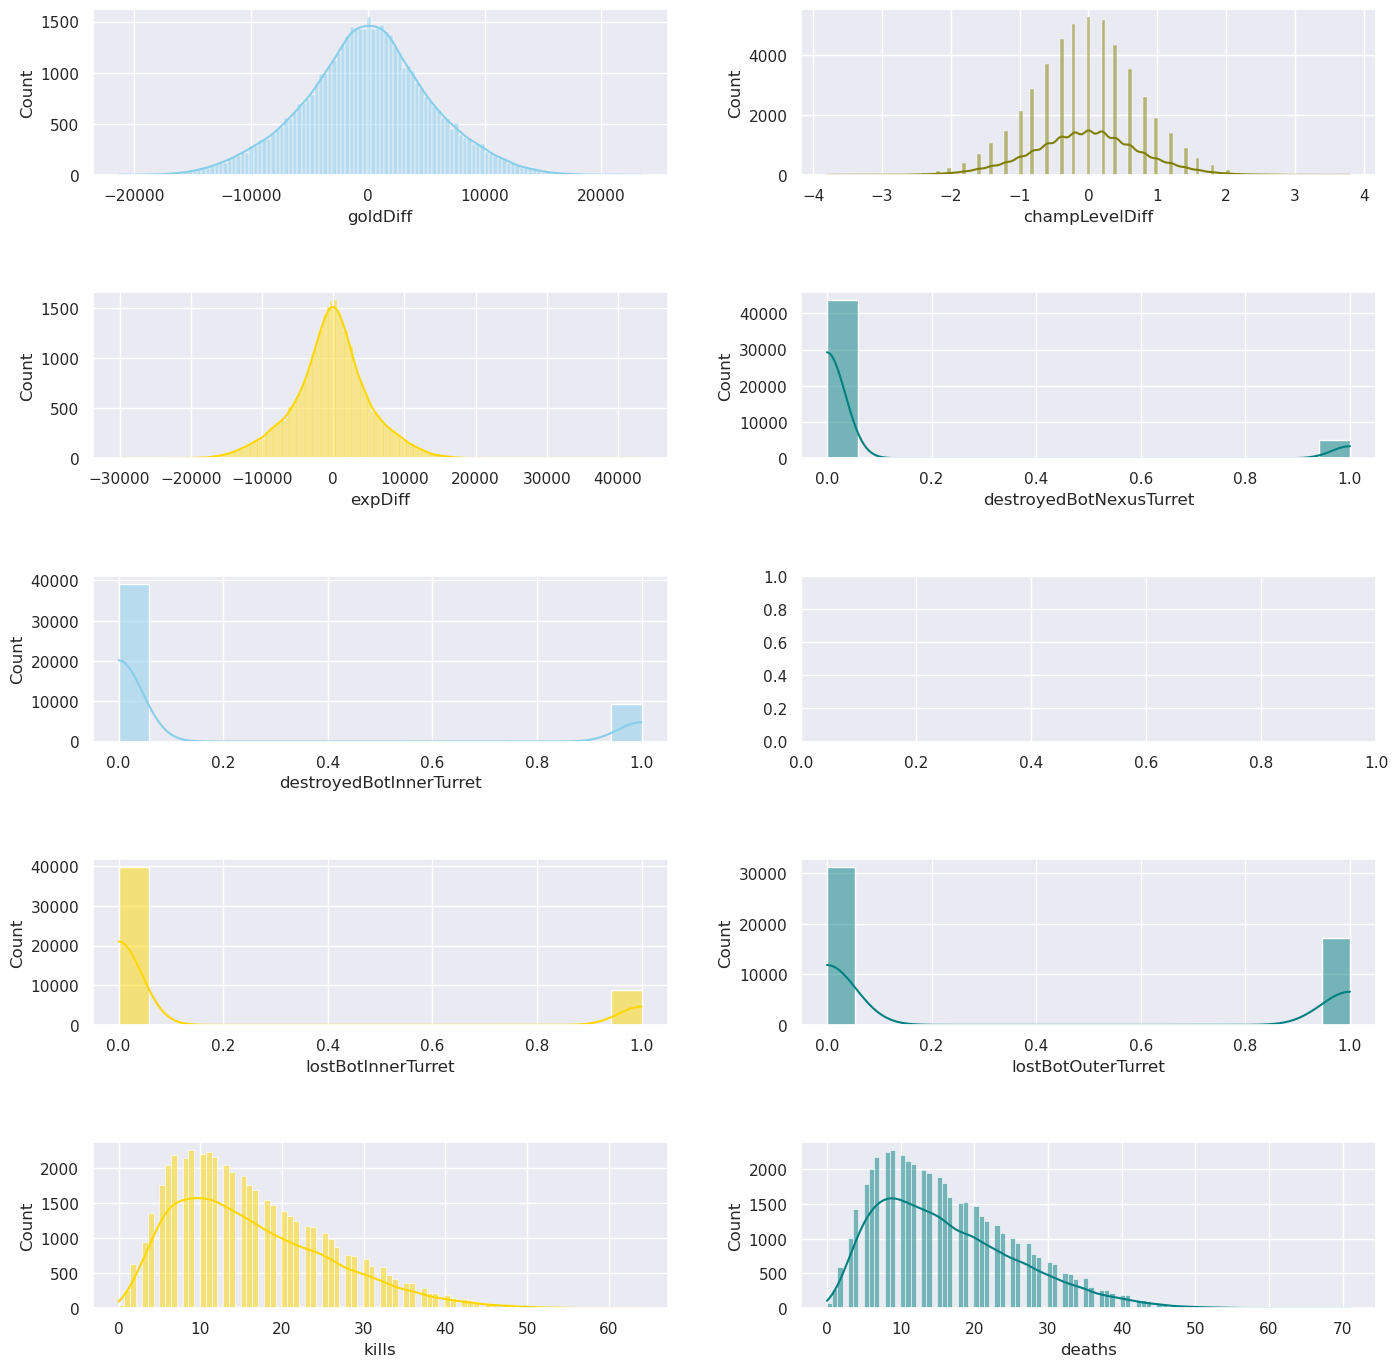

In [11]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(5, 2, figsize=(15, 15))
fig.tight_layout(pad=5.0)

sns.histplot(data=dataset, x="goldDiff", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dataset, x="champLevelDiff", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dataset, x="expDiff", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dataset, x="destroyedBotNexusTurret", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=dataset, x="destroyedBotInnerTurret", kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=dataset, x="lostBotInnerTurret", kde=True, color="gold", ax=axs[3, 0])
sns.histplot(data=dataset, x="lostBotOuterTurret", kde=True, color="teal", ax=axs[3, 1])
sns.histplot(data=dataset, x="kills", kde=True, color="gold", ax=axs[4, 0])
sns.histplot(data=dataset, x="deaths", kde=True, color="teal", ax=axs[4, 1])

plt.show()

As we can see there are some gaussians distributions.

## Data Preparation

In [12]:
##First we will normalize the clean_dataset

from sklearn import preprocessing
clean_dataset = preprocessing.normalize(clean_dataset)

In [13]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_dataset, y, train_size=0.8)

Here we have splitted our data into a train and a test set for train and test our models.

## Model Creation

### SVC 

Añadir mes infor aqui  https://scikit-learn.org/stable/modules/svm.html#classification

In [33]:
from sklearn import svm
clf= svm.SVC(probability=True)
import time
inicio = time.time()
clf.fit(X_train,y_train)
final = time.time()
print("Tiempo: " + str(final-inicio))

Tiempo: 814.6910417079926


Now we have trained our model, now is the time to predict the result.

In [15]:
result = clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(y_test, result)*100, 2)

print('Accuracy:', accuracy, '%')

Accuracy: 78.08 %


In [19]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      4816
           1       0.79      0.77      0.78      4887

    accuracy                           0.78      9703
   macro avg       0.78      0.78      0.78      9703
weighted avg       0.78      0.78      0.78      9703



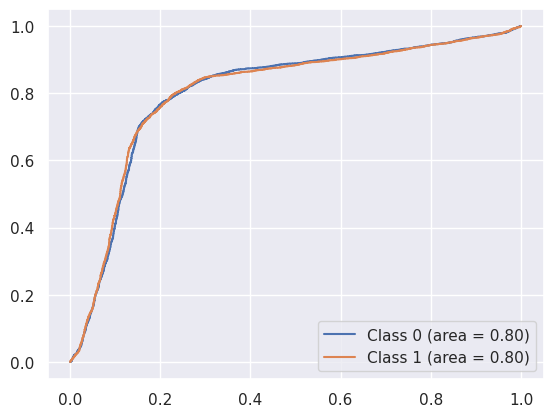

In [34]:
prob=clf.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
fpr = {}
tpr = {}
roc_auc = {}


for i in range(2):
    fpr[i], tpr[i],_  = roc_curve(y_test == i, prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()



## Knn

Temps 0.22113847732543945
Accuracy: 77.64 %


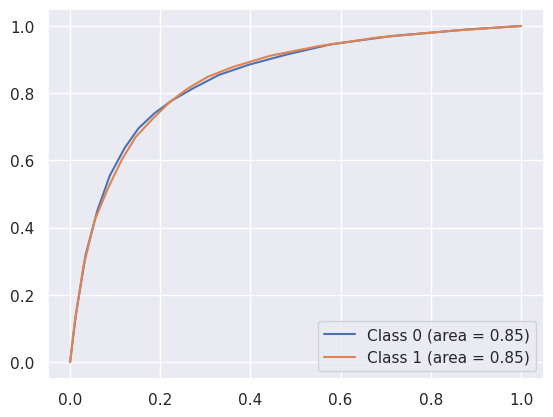

In [20]:
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn.metrics import accuracy_score

n_neighbors = 15

knn = neighbors.KNeighborsClassifier(n_neighbors)
inicio = time.time()
knn.fit(X_train,y_train)
final = time.time()

print("Temps " + str(final-inicio))
result = knn.predict(X_test)


accuracy = round(accuracy_score(y_test, result)*100, 2)

print('Accuracy:', accuracy, '%')
prob=knn.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
fpr = {}
tpr = {}
roc_auc = {}


for i in range(2):
    fpr[i], tpr[i],_  = roc_curve(y_test == i, prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()



In [21]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      4816
           1       0.78      0.77      0.78      4887

    accuracy                           0.78      9703
   macro avg       0.78      0.78      0.78      9703
weighted avg       0.78      0.78      0.78      9703



## SVC Linear

In [36]:
lin_clf = svm.LinearSVC()
import time 
start = time.time()
lin_clf.fit(X_train, y_train)
end = time.time()
print("tiempo: " +str(end-start))
result = lin_clf.predict(X_test)

accuracy = round(accuracy_score(y_test, result)*100, 2)

print('Accuracy:', accuracy, '%')




tiempo: 0.8869030475616455
Accuracy: 78.09 %


In [23]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      4816
           1       0.79      0.77      0.78      4887

    accuracy                           0.78      9703
   macro avg       0.78      0.78      0.78      9703
weighted avg       0.78      0.78      0.78      9703



## Random Forest

Tiempo: 18.656927824020386
Accuracy: 77.22 %


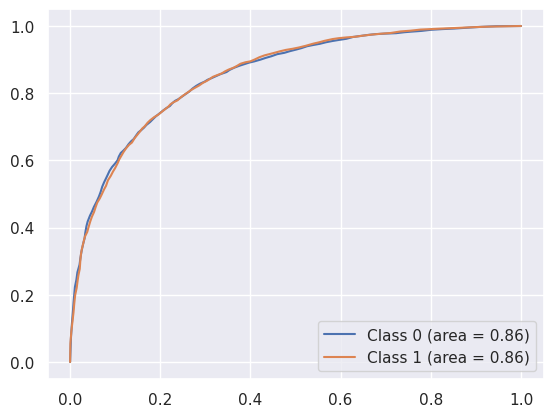

In [24]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100)
inicio = time.time()
random = random.fit(X_train, y_train)
final = time.time()
print("Tiempo: " + str(final-inicio))
result = random.predict(X_test)
prob = random.predict_proba(X_test)


accuracy = round(accuracy_score(y_test, result)*100, 2)


print('Accuracy:', accuracy, '%')


from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
fpr = {}
tpr = {}
roc_auc = {}


for i in range(2):
    fpr[i], tpr[i],_  = roc_curve(y_test == i, prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(2):
    plt.plot(fpr[i], tpr[i], label='Class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [25]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      4816
           1       0.78      0.77      0.77      4887

    accuracy                           0.77      9703
   macro avg       0.77      0.77      0.77      9703
weighted avg       0.77      0.77      0.77      9703



## Red neuronal TensorFlow

In [26]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np



2022-12-13 20:30:39.511495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
modelo = tf.keras.Sequential()
modelo.add(Dense(9,input_shape=(9,),activation='relu'))
modelo.add(Dense(1,activation='sigmoid'))

2022-12-13 20:30:46.502411: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-13 20:30:46.503587: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [28]:
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']  )

In [29]:
historial = modelo.fit(X_train,y_train,epochs=10)

Epoch 1/10
1213/1213 [==============================] - 13s 9ms/step - loss: 0.5245 - accuracy: 0.7633
Epoch 2/10
1213/1213 [==============================] - 10s 8ms/step - loss: 0.4927 - accuracy: 0.7872
Epoch 3/10
1213/1213 [==============================] - 8s 6ms/step - loss: 0.4902 - accuracy: 0.7873
Epoch 4/10
1213/1213 [==============================] - 7s 6ms/step - loss: 0.4884 - accuracy: 0.7871
Epoch 5/10
1213/1213 [==============================] - 6s 5ms/step - loss: 0.4865 - accuracy: 0.7870
Epoch 6/10
1213/1213 [==============================] - 7s 6ms/step - loss: 0.4853 - accuracy: 0.7870
Epoch 7/10
1213/1213 [==============================] - 6s 5ms/step - loss: 0.4840 - accuracy: 0.7871
Epoch 8/10
1213/1213 [==============================] - 6s 5ms/step - loss: 0.4831 - accuracy: 0.7869
Epoch 9/10
1213/1213 [==============================] - 7s 6ms/step - loss: 0.4823 - accuracy: 0.7872
Epoch 10/10
1213/1213 [==============================] - 6s 5ms/step - loss: 0.4

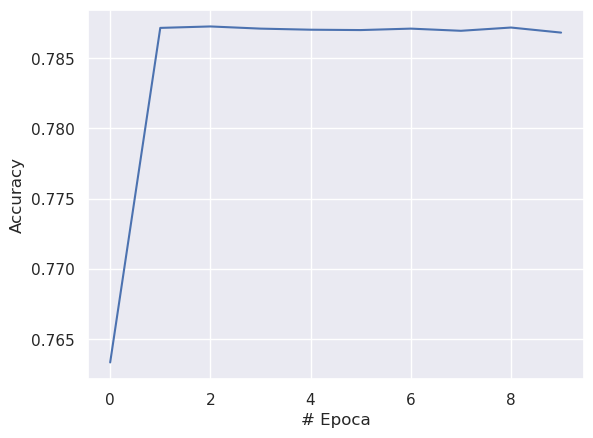

In [30]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Accuracy")
plt.plot(historial.history["accuracy"])

In [31]:
result = modelo.predict(X_test)
prob = result
for x in range(len(result)):
    if result[x] >= 0.5:
        result[x]=1
    else:
        result[x]=0
print(result)

accuracy = round(accuracy_score(y_test, result)*100, 2)

print('Accuracy:', accuracy, '%')

304/304 [==============================] - 2s 6ms/step
[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
Accuracy: 78.14 %


In [32]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      4816
           1       0.79      0.78      0.78      4887

    accuracy                           0.78      9703
   macro avg       0.78      0.78      0.78      9703
weighted avg       0.78      0.78      0.78      9703

